# Autproductie

## Overzicht
We kijken naar de dataset `cars.csv`, deze bevat informatie over de verkoop van 2e hands Volvo’s. We hebben hier een aantal vragen over, beantwoord deze vragen door een beetje code te schrijven en de antwoorden op te schrijven in een Jupyter Notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

file_path = '../Data/Input/cars.csv'

cars = pd.read_csv(file_path)

In [2]:
cars.sample(5)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
266574,Ford,Mustang GT,2015,51712.0,5.0L V8 32V MPFI DOHC,6-Speed Automatic,Rear-wheel Drive,Gasoline,15-25,Ruby Red Metallic Tinted Clearcoat,Ebony,1.0,0.0,1.0,Unlimited Motors,4.9,4.8,276.0,505.0,31500.0
169924,Dodge,Ram 2500 ST,2006,23349.0,5.7L V8 16V MPFI OHV,5-Speed Automatic,Four-wheel Drive,Gasoline,NaN,Flame Red Clearcoat,Medium Slate Gray,0.0,1.0,0.0,Midwest Auto Store,2.4,4.5,41.0,NaN,16799.0
314557,Honda,HR-V EX-L w/Navigation,2017,114444.0,1.8L I4 16V MPFI SOHC,Automatic CVT,Front-wheel Drive,Gasoline,28-34,Milano Red,Black,1.0,0.0,1.0,Morganton Honda,4.7,4.6,202.0,NaN,17890.0
3594,Acura,RDX,2009,55234.0,2.3L I4 16V MPFI DOHC Turbo,5-Speed Automatic,All-wheel Drive,Gasoline,17-22,Black,Gray,0.0,0.0,1.0,Ohio Car Mart,NaN,4.6,16.0,NaN,13999.0
203692,Ford,Explorer Sport,2018,79938.0,"EcoBoost 3.5L V-6 gasoline direct injection, D...",Automatic,Four-wheel Drive,Gasoline,16-22,Black,Ebony Black w/Red Accent Stitching,1.0,0.0,1.0,Drive Away Enterprises,NaN,4.8,266.0,NaN,29000.0


In [3]:
print(cars.isna().sum())
cleaned_cars = cars.dropna()
cleaned_cars.sample(5)

manufacturer                0
model                       0
year                        0
mileage                   506
engine                  15050
transmission             9904
drivetrain              21562
fuel_type               22927
mpg                    142071
exterior_color           8859
interior_color          56975
accidents_or_damage     24212
one_owner               31483
personal_use_only       24852
seller_name              8593
seller_rating          213973
driver_rating           31632
driver_reviews_num          0
price_drop             351979
price                       0
dtype: int64


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
9034,Audi,Q8 55 Prestige,2020,34199.0,3.0L V6 24V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,17-21,Carrara White,Black,0.0,1.0,1.0,Audi Orange Park,4.5,4.7,6.0,1992.0,62995.0
344125,Hyundai,Veloster Turbo,2020,69988.0,1.6L I4 16V GDI DOHC Turbo,7-Speed Automatic with Auto-Shift,Front-wheel Drive,Gasoline,28-34,Chalk White,Black,0.0,1.0,1.0,Prime Subaru Manchester,4.8,4.9,15.0,258.0,19112.0
107712,Chevrolet,Impala 1LT,2018,44590.0,3.6L V6 24V GDI DOHC,6-Speed Automatic,Front-wheel Drive,Gasoline,22-30,Mosaic Black Metallic,Dark Titanium / Jet Black,1.0,0.0,0.0,North Coast Auto Mall of Cleveland,4.2,4.8,123.0,630.0,19333.0
75667,Buick,Encore Sport Touring,2019,20460.0,1.4L I4 16V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,24-29,Summit White,Ebony,0.0,1.0,1.0,Chesrown Chevrolet Buick GMC,4.2,4.7,183.0,600.0,22995.0
622228,RAM,1500 Classic Express,2019,29792.0,3.6L V6 24V MPFI DOHC Flexible Fuel,8-Speed Automatic,Four-wheel Drive,E85 Flex Fuel,16-23,Delmonico Red Pearlcoat,Black,0.0,1.0,1.0,Novak Motors New Jersey,5.0,4.7,143.0,201.0,32298.0


### Vraag 1:
Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? Motiveer je antwoord.

**year** is categorisch, ordinaal. Want niet zinvol om op te tellen maar er zit wel een rangschikking in.
**Fuel_type** is categorisch, niet-ordinaal. 
**seller_rating** is categorisch, ordinaal.

In [4]:
columns_to_check = ['year', 'fuel_type', 'seller_rating']

types_of_columns = cars[columns_to_check].dtypes

print(types_of_columns)

year               int64
fuel_type         object
seller_rating    float64
dtype: object


### Vraag 2:
Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. Kan je deze zoeken en tonen?

In [5]:
mean_price_volvo = cars.groupby('manufacturer').get_group('Volvo')['price'].mean()
median_price_volvo = cars.groupby('manufacturer').get_group('Volvo')['price'].median()

print("Gemiddelde prijs tweedehands Volvo:", mean_price_volvo, 
    "\nMediaan prijs tweedehands Volvo:", median_price_volvo)

#volvo zoeken die gelijk is aan mediaan, gemiddelde weg

Gemiddelde prijs tweedehands Volvo: 35799.97826303719 
Mediaan prijs tweedehands Volvo: 36673.0


### Vraag 3:
We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
![alt text](image.png)
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cummulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

In [80]:
Mediaan en gemiddelde liggen ongeveer in het midden omdat het een normaalverdeling is.

SyntaxError: invalid syntax (4228691272.py, line 1)

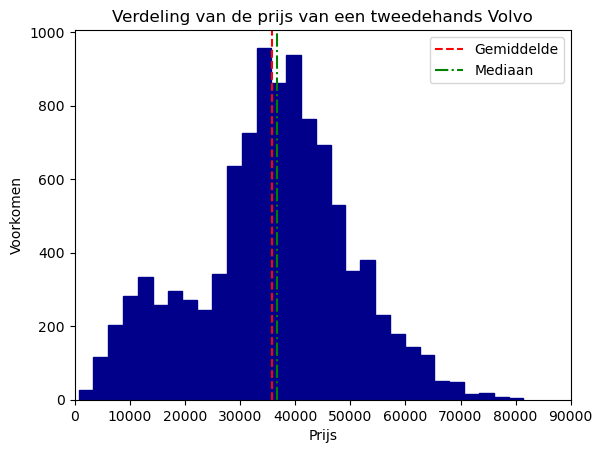

In [79]:
# Filter data for Volvo cars
volvo_prices = cars.loc[cars['manufacturer'] == 'Volvo', 'price']

# Plot histogram
plt.hist(volvo_prices, bins=30, color='darkblue', edgecolor='darkblue')
plt.axvline
plt.xlabel('Prijs')
plt.ylabel('Voorkomen')
plt.title('Verdeling van de prijs van een tweedehands Volvo')
plt.axvline(mean_price_volvo, color='red', linestyle='--', label='Gemiddelde')
plt.axvline(median_price_volvo, color='green', linestyle='-.', label='Mediaan')
plt.legend()
plt.xlim(0,90000)
plt.show()

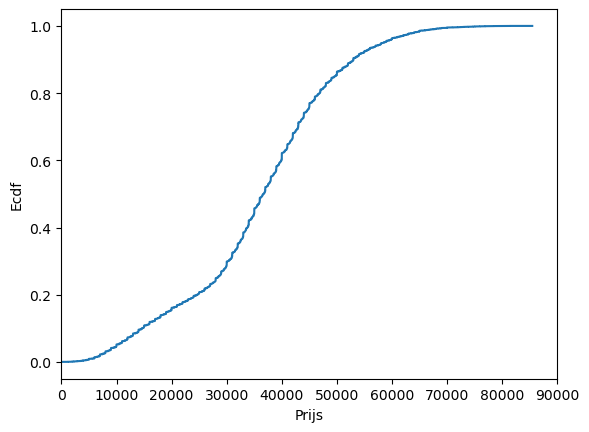

In [81]:
res = stats.ecdf(cars.loc[cars['manufacturer'] == 'Volvo', 'price'])
res.cdf.quantiles
res.cdf.probabilities
ax = plt.subplot()
res.cdf.plot(ax)
ax.set_xlabel('Prijs')
ax.set_ylabel('Ecdf')
plt.xlim(0,90000)
plt.show()

#Horizontale as om de helft (0,5)

### Vraag 4:
Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?
![alt text](image-1.png)

In [41]:
#Alleen ELectric, Gasoline en Hybrid, zoals in de opgave
desired_fuel_types = ['Electric', 'Gasoline', 'Hybrid']
fuel_type_prices = cars[cars['fuel_type'].isin(desired_fuel_types)][['fuel_type', 'price']]

# Drop NaN values in the 'price' column
fuel_type_prices.dropna(subset=['price'], inplace=True)

# Convert 'price' column to integers
fuel_type_prices['price'] = fuel_type_prices['price'].astype(int)

# Compute frequency counts for each price for each fuel type
electric_counts = fuel_type_prices[fuel_type_prices['fuel_type'] =='Electric']['price'].value_counts()
gasoline_counts = fuel_type_prices[fuel_type_prices['fuel_type'] =='Gasoline']['price'].value_counts()
hybrid_counts = fuel_type_prices[fuel_type_prices['fuel_type'] =='Hybrid']['price'].value_counts()

print(electric_counts)
print(gasoline_counts.max())

price
39995    53
34995    49
38995    47
49995    46
54995    45
         ..
50300     1
45979     1
48287     1
25880     1
55795     1
Name: count, Length: 7520, dtype: int64
2814


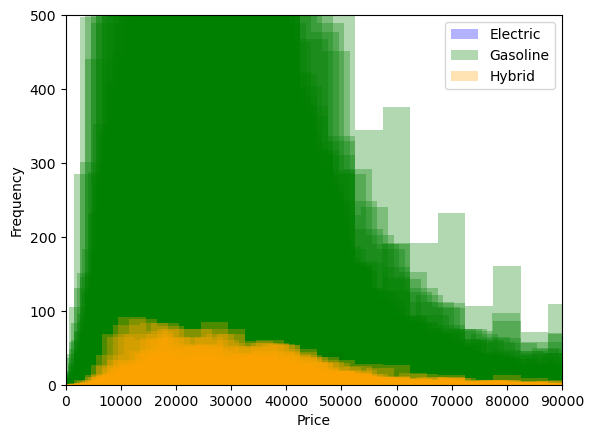

In [59]:
# Plot histograms
plt.bar(electric_counts.index, electric_counts.values, alpha=0.3, color='blue', width=5000)
plt.bar(gasoline_counts.index, gasoline_counts.values, alpha=0.3, color='green', width=5000)
plt.bar(hybrid_counts.index, hybrid_counts.values, alpha=0.3, color='orange', width=5000)

plt.xlabel('Price')
plt.ylabel('Frequency')

plt.xlim(0, 90000)
plt.ylim(0, 500)

plt.legend(['Electric', 'Gasoline', 'Hybrid'])

plt.show()

#plt.hist met density om verdeling beter te tonen

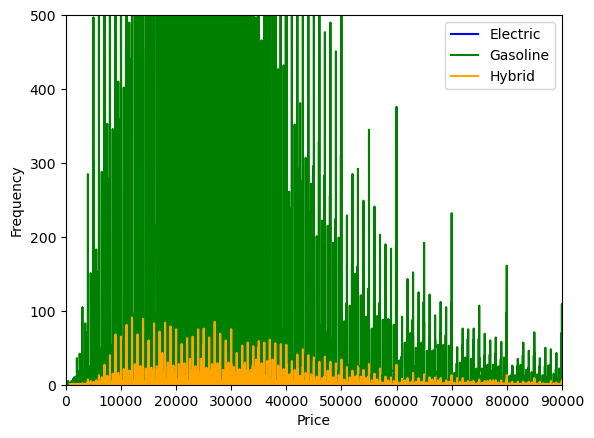

In [51]:
# Sort the values by price
electric_counts_sorted = electric_counts.sort_index()
gasoline_counts_sorted = gasoline_counts.sort_index()
hybrid_counts_sorted = hybrid_counts.sort_index()

# Plot line charts
plt.plot(electric_counts_sorted.index, electric_counts_sorted.values, color='blue', label='Electric')
plt.plot(gasoline_counts_sorted.index, gasoline_counts_sorted.values, color='green', label='Gasoline')
plt.plot(hybrid_counts_sorted.index, hybrid_counts_sorted.values, color='orange', label='Hybrid')

plt.xlabel('Price')
plt.ylabel('Frequency')

plt.xlim(0, 90000)
plt.ylim(0, 500)

plt.legend()

plt.show()


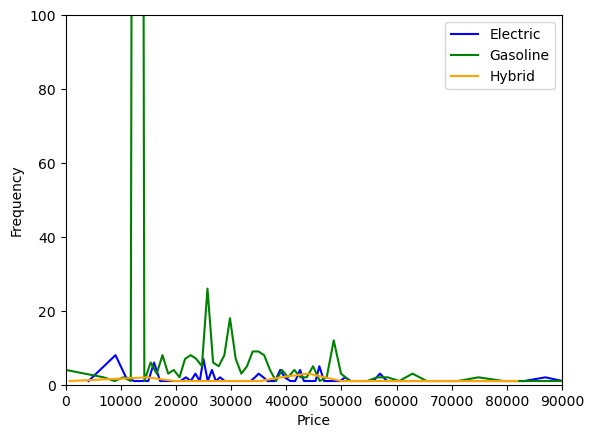

In [57]:
# Downsample the data
electric_counts_downsampled = electric_counts_sorted.iloc[::100]
gasoline_counts_downsampled = gasoline_counts_sorted.iloc[::1000]
hybrid_counts_downsampled = hybrid_counts_sorted.iloc[::1000]

# Plot smoothed lines
plt.plot(electric_counts_downsampled.index, electric_counts_downsampled.values, color='blue', label='Electric')
plt.plot(gasoline_counts_downsampled.index, gasoline_counts_downsampled.values, color='green', label='Gasoline')
plt.plot(hybrid_counts_downsampled.index, hybrid_counts_downsampled.values, color='orange', label='Hybrid')

plt.xlabel('Price')
plt.ylabel('Frequency')

plt.xlim(0, 90000)
plt.ylim(0, 100)

plt.legend()

plt.show()


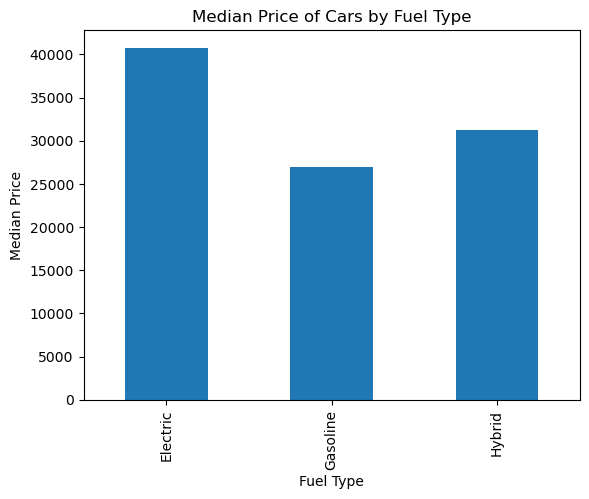

In [11]:
# Calculate median price of each fuel type
median_prices = fuel_type_prices.groupby('fuel_type')['price'].median()

# Plot the medians
median_prices.plot(kind='bar')
plt.xlabel('Fuel Type')
plt.ylabel('Median Price')
plt.title('Median Price of Cars by Fuel Type')
plt.show()


### Vraag 5:
Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:

![alt text](image-2.png)

 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.

 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.

 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.

**Fout**, de spreiding op de prijs van elektrische wagens is kleiner dan die van benzinewagens. De box en whiskers zijn namelijk korter dus is de spreidingsbreedte kleiner.

Het is **niet mogelijk** om te besluiten of wagen die meer dan 50 000 euro kost een grotere kans om elektrisch te zijn dan benzine. De boxplots zeggen iets over het minimum, het eerste kwartiel, de mediaan, het derde kwartiel en het maximum van een bepaalde populatie (Electric en Gasoline). We weten niet hoeveel auto's er in totaal in de verschillende populaties zitten dus weten we niet of de kans groter is dat de wagen elektrisch of benzine zou zijn.

**Juist**, een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen. Het derde kwartiel ligt op 50 000 dus 25% ligt boven de 50 000 euro. Bij benzine ligt het derde kwartiel lager dus is er minder dan 25% boven de 50 000 euro. 


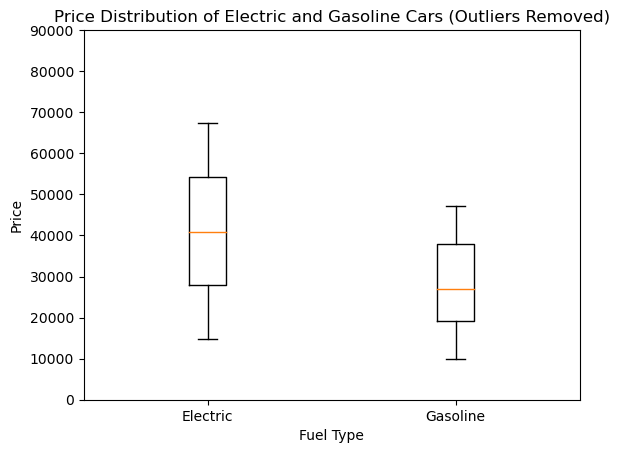

In [72]:
price_electric = cars.groupby('fuel_type').get_group('Electric')['price']
price_gasoline = cars.groupby('fuel_type').get_group('Gasoline')['price']

# Combine data into a list of lists
combined_data = [price_electric.tolist(), price_gasoline.tolist()]

# Create a box plot without outliers
plt.boxplot(combined_data, labels=['Electric', 'Gasoline'], whis=0.5, showfliers=False) 

plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Price Distribution of Electric and Gasoline Cars (Outliers Removed)')
plt.ylim(0, 90000)

# Show the plot
plt.show()


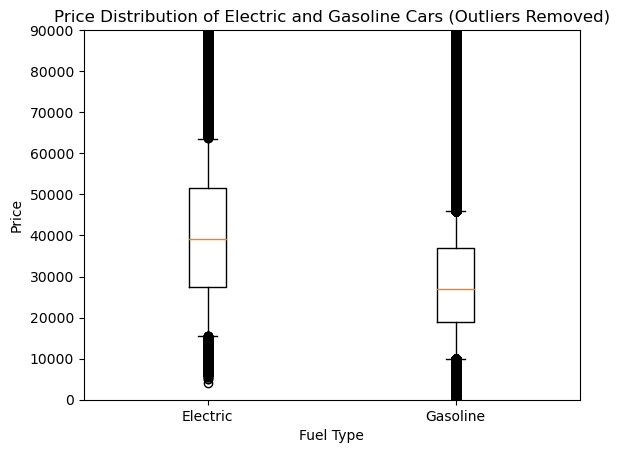

In [71]:
price_electric = cars.groupby('fuel_type').get_group('Electric')['price']
price_gasoline = cars.groupby('fuel_type').get_group('Gasoline')['price']

# Define the threshold for outliers
threshold = 100000

# Filter outliers
price_electric_filtered = price_electric[price_electric <= threshold]
price_gasoline_filtered = price_gasoline[price_gasoline <= threshold]

# Combine filtered data into a list of lists
combined_data_filtered = [price_electric_filtered.tolist(), price_gasoline_filtered.tolist()]

# Create a box plot with filtered data
plt.boxplot(combined_data_filtered, labels=['Electric', 'Gasoline'], whis=0.5) 

plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Price Distribution of Electric and Gasoline Cars (Outliers Removed)')
plt.ylim(0, 90000)

# Show the plot
plt.show()


### Vraag 6:
Maak een visualizatie om het verband tussen mileage & price te tonen?

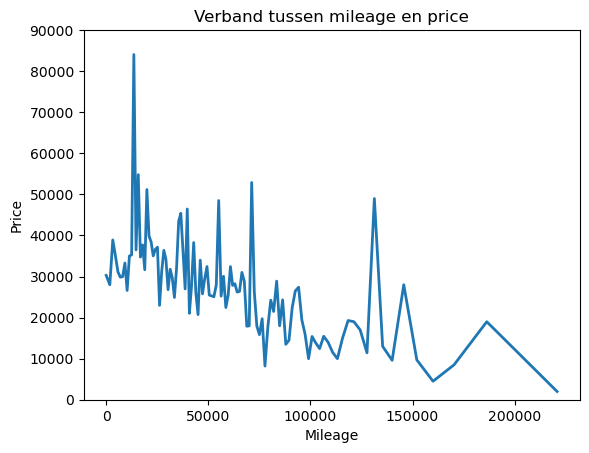

In [82]:
import numpy as np

# Calculate mean price for each unique mileage value
mean_prices = cleaned_cars.groupby('mileage')['price'].mean()

# Downsample the data
downsampled_mean_prices = mean_prices.iloc[::1000]  # Change 100 to adjust the downsampling rate

# Create a line plot with smoother line and fewer points
plt.plot(downsampled_mean_prices.index, downsampled_mean_prices.values, linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Verband tussen mileage en price')
plt.ylim(0, 90000)

# Show the plot
plt.show()


### Vraag 7:
Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s 48 000 euro; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?

In [ ]:
#gemiddelde berekenen
#getrouwheidsinterval